In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data = pd.read_csv("deseasonalized_data.csv")
data.index =pd.to_datetime(data['Datetime'])
data = data.drop('Datetime', axis=1)

In [3]:
df = data
data

,dew,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,deseasonalised,Day sin,Day cos,Month sin,Month cos
Datetime,,,,,,,,,,,,,,
2023-01-02 09:00:00,10.0,1.1,0.0,0.0,1023.0,0.0,1.0,74.0,0.3,1.0,7.071068e-01,-7.071068e-01,0.923880,-0.382683
2023-01-02 10:00:00,10.0,2.5,0.0,0.0,1023.0,0.0,1.0,244.0,0.9,35.0,5.000000e-01,-8.660254e-01,0.920505,-0.390731
2023-01-02 11:00:00,10.5,1.1,0.0,353.9,1023.3,3.3,1.0,407.0,1.5,-2.0,2.588190e-01,-9.659258e-01,0.917060,-0.398749
2023-01-02 12:00:00,11.0,2.2,5.4,210.0,1022.0,0.0,1.0,527.0,1.9,-2.0,1.212070e-11,-1.000000e+00,0.913545,-0.406737
2023-01-02 13:00:00,11.0,3.6,9.4,240.0,1022.0,0.0,1.0,588.0,2.1,-1.0,-2.588190e-01,-9.659258e-01,0.909961,-0.414693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-12 14:00:00,10.6,17.6,8.5,298.0,1012.9,0.0,4.1,837.0,3.0,0.0,-5.000000e-01,-8.660254e-01,-0.906308,0.422618
2024-03-12 15:00:00,6.0,18.4,13.0,300.0,1014.0,0.0,5.0,767.0,2.8,1.0,-7.071068e-01,-7.071068e-01,-0.902585,0.430511
2024-03-12 16:00:00,6.0,18.7,13.0,300.0,1013.0,0.0,5.0,630.0,2.3,2.0,-8.660254e-01,-5.000000e-01,-0.898794,0.438371


In [4]:
print(df.columns)

Index(['dew', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy',
       'deseasonalised', 'Day sin', 'Day cos', 'Month sin', 'Month cos'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import numpy as np


# Assuming you have LSTM and CNN models defined and trained
model = load_model('models/model22_15win/')


X_test_data = [
    [9.9, 17.6, 2.5, 360.0, 1016.8, 0.0, 2.0, 182.0, 0.7, 8.0, -0.9659258262869810, -0.25881904511030900, -0.26723837607799000, 0.963630453208697],
    [9.0, 18.4, 7.6, 350.0, 1018.0, 0.0, 2.0, 33.0, 0.1, 0.0, -1.0, -1.33413298517845E-11, -0.25881904510254000, 0.9659258262890630],
    [10.0, 20.9, 9.4, 260.0, 1022.0, 0.0, 1.0, 88.0, 0.3, 0.0, 0.707106781190223, -0.7071067811828720, -0.1305261922199830, 0.9914448613738200],
    [9.0, 20.2, 11.2, 270.0, 1022.0, 0.0, 1.0, 258.0, 0.9, 2.0, 0.5000000000090720, -0.8660254037792010, -0.1218693434053740, 0.9925461516412940],
    [9.8, 20.2, 10.4, 285.0, 1021.0, 0.0, 1.2, 417.0, 1.5, 4.0, 0.2588190451036810, -0.9659258262887570, -0.11320321376842800, 0.9935718556765280],
    [9.0, 20.9, 14.8, 270.0, 1020.0, 0.0, 2.0, 531.0, 1.9, 6.0, 6.47944707820119E-12, -1.0, -0.10452846326756700, 0.9945218953682830],
    [8.0, 20.5, 14.8, 270.0, 1020.0, 0.0, 3.0, 584.0, 2.1, 7.0, -0.25881904509116400, -0.9659258262921110, -0.09584575252043300, 0.9953961983671590]
]

# Convert X_test_data to numpy array
X_test_data = np.array(X_test_data)

# Reshape X_test_data to match the input shape expected by the model
X_test_data_reshaped = np.reshape(X_test_data, (1, X_test_data.shape[0], X_test_data.shape[1]))
scaler.fit(X_train)
# Make a prediction for the reshaped X_test_data
X_test_data_normalized = scaler.transform(X_test_data)

# Reshape and predict as before
X_test_data_normalized_reshaped = np.reshape(X_test_data_normalized, (1, X_test_data_normalized.shape[0], X_test_data_normalized.shape[1]))
predicted_value_normalized = model.predict(X_test_data_normalized_reshaped)

# Inverse transform the predicted value to get it back to the original scale
predicted_value = scaler.inverse_transform(predicted_value_normalized)

# Print the predicted value
print("Predicted value:", predicted_value)
# Make predictions on the reshaped test data

# Initialize lists to store R^2 and MSE for each hour


In [ ]:
r2_scores = []
mse_scores = []

# Iterate over each hour from 8:00 AM to 7:00 PM
for hour in range(8, 20):
    # Calculate indices corresponding to the hour in the test set
    indices = (df.index.hour == hour)
    
    # Select the predictions and actual values for the current hour using boolean index
    hour_predictions = predictions[indices]
    hour_actual = y_test[indices]
    
    # Calculate R^2 and MSE for the current hour
    r2 = r2_score(hour_actual, hour_predictions)
    mse = mean_squared_error(hour_actual, hour_predictions)
    
    # Optionally, print or store the results for each hour
    print(f"For hour {hour}: R^2 = {r2}, MSE = {mse}")

In [8]:
import tensorflow as tf

def mean_absolute_percentage_error(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float64)
    y_pred = tf.cast(y_pred, dtype=tf.float64)
    
    epsilon = 1e-10
    y_true = tf.where(tf.equal(y_true, 0), y_true + epsilon, y_true)
    
    mape = tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100
    
    return mape

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming predicted_value and actual_value are your predicted and actual values respectively
predicted_values = [0.523118, 0.459671, 0.419804, 0.411262, 0.425938, 0.449800, 0.517183, 0.529078, 0.530867]
actual_values = [0.480769, 0.442308, 0.432692, 0.442308, 0.451923, 0.461538, 0.480769, 0.490385, 0.509615]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)
mape = mean_absolute_percentage_error(actual_values, predicted_values)
r_squared = r2_score(actual_values, predicted_values)


print("MSE for one value:", mse)
print("MAE for one value:", mae)
print("r_squared error: ", r_squared)
print("mape: ", mape)

MSE for one value: 0.0008125158053333327
MAE for one value: 0.026414222222222214
r_squared error:  -0.35848464682100123
mape:  tf.Tensor(5.628838163155985, shape=(), dtype=float64)


# For only LSTM Model

# 2nd Feb 2024

Mean Squared Error (MSE): 0.0022420512105000004
Mean Absolute Error (MAE): 0.0401788
R-squared (R2) score: 0.9407805255233238


Text(0, 0.5, 'Prediction')

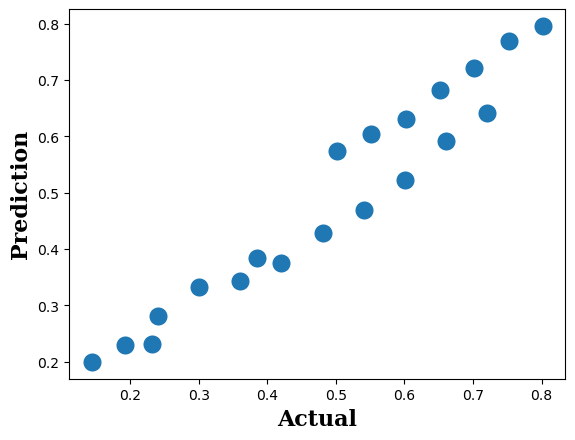

In [27]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is your DataFrame containing the predicted and actual values
df = pd.DataFrame({
    'Predictions': [0.796085, 0.768769, 0.721559, 0.681586, 0.631613, 0.604282, 0.574582, 
                    0.199513, 0.229760, 0.280752, 0.332784, 0.343920, 0.374661,0.384360,
                    0.429296, 0.469975, 0.522873, 0.591936, 0.641917, 0.231232],
    'Actuals': [0.801923, 0.751923, 0.701923, 0.651923, 0.601923, 0.551923, 0.501923,  
                  0.144231, 0.192308, 0.240385, 0.300481, 0.360577, 0.420673,0.384360,
                0.480769, 0.540865, 0.600962, 0.661058, 0.721154, 0.231231]
})

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df['Actuals'], df['Predictions'])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Actuals'], df['Predictions'])

# Calculate R-squared (R2) score
r_squared = r2_score(df['Actuals'], df['Predictions'])

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r_squared)


from matplotlib import pyplot as plt
plt.scatter(df['Actuals'], df['Predictions'], linewidths=7)
plt.xlabel('Actual',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Prediction',fontsize=16, fontweight='bold',fontfamily='serif')

# February

In [28]:
import pandas as pd

data = {
    'Predictions': [0.796085, 0.768769, 0.721559, 0.681586, 0.631613, 0.604282, 0.574582, 0.551770, 0.467956, 0.297031, 
                    0.233065, 0.198989, 0.166951, 0.184046, 0.199513, 0.229760, 0.280752, 0.332784, 0.343920, 0.374661, 
                    0.429296, 0.469975, 0.522873, 0.591936, 0.641917, 0.669076, 0.452751, 0.423129, 0.540596, 0.635477, 
                    0.698138, 0.757923, 0.804425, 0.804857, 0.797260, 0.776883, 0.758853, 0.752750, 0.682526, 0.719504, 
                    0.736364, 0.736155, 0.731866, 0.732546, 0.764553, 0.663570, 0.609793, 0.552061, 0.447617, 0.472773, 
                    0.510198, 0.555960, 0.563020, 0.540601, 0.490872, 0.445030, 0.421676, 0.415927, 0.498595, 0.398076, 
                    0.214391, 0.233899, 0.336917, 0.221264, 0.395561, 0.507435, 0.596054, 0.697841, 0.626522, 0.721777, 
                    0.745069, 0.751894, 0.747183, 0.725089, 0.699938, 0.634922, 0.577914, 0.505597, 0.456787, 0.451511, 
                    0.455563, 0.450827, 0.456493, 0.478081, 0.491882, 0.496980, 0.513996, 0.507931, 0.429668, 0.450132, 
                    0.466436, 0.482433, 0.491254, 0.491626, 0.493938, 0.494684, 0.497461, 0.513823, 0.432360, 0.292709, 
                    0.417826, 0.447274, 0.435586, 0.438160, 0.402790, 0.366391, 0.341474, 0.331364, 0.283613, 0.275979, 
                    0.270928, 0.274512, 0.283039, 0.212691, 0.136520, 0.447970, 0.604564, 0.664249, 0.784396, 0.826643, 
                    0.820165, 0.796212, 0.782221, 0.769842, 0.748641, 0.735354, 0.747264, 0.751042, 0.563006, 0.504191, 
                    0.482431, 0.487495, 0.516263, 0.548513, 0.568245, 0.566251, 0.572218, 0.560290, 0.546008, 0.570934, 
                    0.586968, 0.584231, 0.575028, 0.564046, 0.557758, 0.535486, 0.528924, 0.519286, 0.506438, 0.519743, 
                    0.492364, 0.514358, 0.473952, 0.497525, 0.505075, 0.510466, 0.524121, 0.525319, 0.383972, 0.280158, 
                    0.229644, 0.207990, 0.211234, 0.218144, 0.236847, 0.233725, 0.248501, 0.243278, 0.516392, 0.584775, 
                    0.648178, 0.656067, 0.679225, 0.699676, 0.664541, 0.704692, 0.722257, 0.762381, 0.557182, 0.469947, 
                    0.485386, 0.497547, 0.487081, 0.518608, 0.707752, 0.581733, 0.534451, 0.482266, 0.542534, 0.632133, 
                    0.671142, 0.702285, 0.708545, 0.679320, 0.660291, 0.669316, 0.602604, 0.582829, 0.415036, 0.255776, 
                    0.181767, 0.304738, 0.450980, 0.513122, 0.507531, 0.495103, 0.516354, 0.511921, 0.655270, 0.689900, 
                    0.674668, 0.626765, 0.592200, 0.573151, 0.550828, 0.536024, 0.529424, 0.516407, 0.389437, 0.364399, 
                    0.308623, 0.214801, 0.119352, 0.195528, 0.148468, 0.178634, 0.242908, 0.307487, 0.392761],
    'Actuals': [0.801923, 0.751923, 0.701923, 0.651923, 0.601923, 0.551923, 0.501923, 0.451923, 0.163462, 0.128205, 
                0.092949, 0.057692, 0.048077, 0.096154, 0.144231, 0.192308, 0.240385, 0.300481, 0.360577, 0.420673, 
                0.480769, 0.540865, 0.600962, 0.661058, 0.721154, 0.240385, 0.355769, 0.653846, 0.721154, 0.788462, 
                0.855769, 0.851763, 0.847756, 0.843750, 0.839744, 0.835737, 0.831731, 0.827724, 0.823718, 0.819712, 
                0.815705, 0.811699, 0.807692, 0.894231, 0.692308, 0.634615, 0.567308, 0.480769, 0.567308, 0.586538, 
                0.615385, 0.596154, 0.557692, 0.519231, 0.461538, 0.403846, 0.346154, 0.557692, 0.298077, 0.009615, 
                0.187500, 0.365385, 0.057692, 0.442308, 0.538462, 0.634615, 0.730769, 0.576923, 0.846154, 0.849359, 
                0.852564, 0.855769, 0.822115, 0.788462, 0.705128, 0.621795, 0.538462, 0.519231, 0.519231, 0.500000, 
                0.490385, 0.500000, 0.519231, 0.519231, 0.519231, 0.528846, 0.519231, 0.500000, 0.480769, 0.480769, 
                0.490385, 0.500000, 0.500000, 0.500000, 0.528846, 0.528846, 0.538462, 0.413462, 0.173077, 0.557692, 
                0.512821, 0.467949, 0.423077, 0.386538, 0.350000, 0.313462, 0.276923, 0.240385, 0.242788, 0.245192, 
                0.247596, 0.250000, 0.129808, 0.009615, 0.692308, 0.711538, 0.730769, 0.903846, 0.899573, 0.895299, 
                0.891026, 0.886752, 0.882479, 0.878205, 0.873932, 0.869658, 0.865385, 0.519231, 0.528846, 0.528846, 
                0.548077, 0.596154, 0.615385, 0.615385, 0.615385, 0.605769, 0.576923, 0.576923, 0.625000, 0.653846, 
                0.663462, 0.644231, 0.625000, 0.615385, 0.596154, 0.557692, 0.528846, 0.538462, 0.557692, 0.557692, 
                0.548077, 0.480769, 0.538462, 0.538462, 0.538462, 0.548077, 0.528846, 0.307692, 0.201923, 0.189904, 
                0.177885, 0.165865, 0.153846, 0.141827, 0.129808, 0.117788, 0.105769, 0.653846, 0.663462, 0.686298, 
                0.709135, 0.731971, 0.754808, 0.777644, 0.800481, 0.823317, 0.846154, 0.509615, 0.442308, 0.519231, 
                0.548077, 0.519231, 0.576923, 0.932692, 0.586538, 0.543269, 0.500000, 0.596154, 0.730769, 0.711538, 
                0.740385, 0.788462, 0.759615, 0.750000, 0.788462, 0.721154, 0.653846, 0.326923, 0.134615, 0.173077, 
                0.355769, 0.538462, 0.519231, 0.509615, 0.500000, 0.509615, 0.519231, 0.788462, 0.754808, 0.721154, 
                0.687500, 0.653846, 0.644231, 0.625000, 0.605769, 0.576923, 0.548077, 0.336538, 0.394231, 0.262821, 
                0.131410, 0.000000, 0.211538, 0.048077, 0.105769, 0.163462, 0.230769, 0.384615, 0.392763]
}

df = pd.DataFrame(data)
print(df)


     Predictions   Actuals
0       0.796085  0.801923
1       0.768769  0.751923
2       0.721559  0.701923
3       0.681586  0.651923
4       0.631613  0.601923
..           ...       ...
224     0.148468  0.105769
225     0.178634  0.163462
226     0.242908  0.230769
227     0.307487  0.384615
228     0.392761  0.392763

[229 rows x 2 columns]


Mean Squared Error (MSE): 0.01531136351334061
Mean Absolute Error (MAE): 0.09097860698689957
R-squared (R2) score: 0.7035083386294034


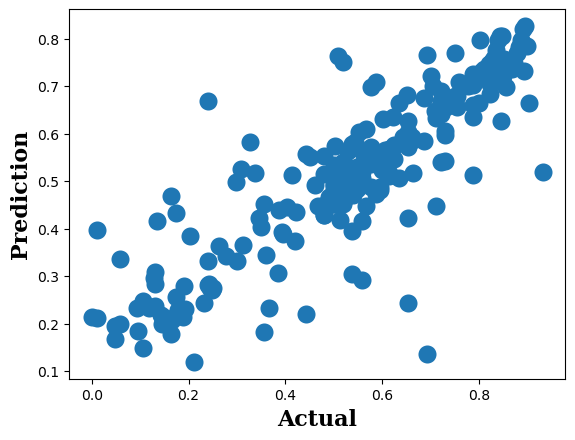

In [29]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df['Actuals'], df['Predictions'])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Actuals'], df['Predictions'])

# Calculate R-squared (R2) score
r_squared = r2_score(df['Actuals'], df['Predictions'])

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r_squared)


from matplotlib import pyplot as plt
plt.scatter(df['Actuals'], df['Predictions'], linewidths=7)
# Labels and title
plt.xlabel('Actuals')
plt.ylabel('Predictions')


# Labels and title
plt.xlabel('Actual',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Prediction',fontsize=16, fontweight='bold',fontfamily='serif')

# Show plot
plt.show()

# Jan

In [30]:
data = { 'Predictions' : [0.446523, 0.469727, 0.531836, 0.557036, 0.563405, 0.559753, 0.547418, 0.538015, 0.528367, 0.475594, 
               0.466724, 0.522476, 0.540649, 0.546103, 0.531610, 0.537469, 0.517977, 0.494639, 0.511890, 0.466959, 
               0.490970, 0.529526, 0.555560, 0.635010, 0.642970, 0.633133, 0.597778, 0.567345, 0.545951, 0.467154, 0.361900, 0.376086, 0.369628, 0.501152,  0.496095,
                        0.668530, 0.617497, 0.619813, 0.646559, 0.732946, 0.607151, 0.523118, 0.459671, 0.419804, 0.411262, 
               0.425938, 0.449800, 0.517183, 0.529078, 0.530867, 0.543750, 0.530950, 0.288214, 0.289726, 0.325195, 0.355048, 0.399052, 0.418648, 0.441593, 0.470849, 0.493770, 0.444351, 
               0.632433, 0.760054, 0.759895, 0.729329, 0.693657, 0.648832, 0.601789, 0.585008, 0.553850, 0.562743, 
               0.598510, 0.517052, 0.511803, 0.473716, 0.439508, 0.440974, 0.455435, 0.456770, 0.507351, 0.436585, 
               0.399731, 0.391949, 0.353851, 0.640836, 0.673786, 0.685487, 0.552540, 0.503688, 0.511154, 0.511029, 0.460821, 0.559327, 
               0.617383, 0.608317, 0.583221, 0.252739, 0.122212, 0.432692],

              'Actuals': [0.538462, 0.548077, 0.557692, 0.567308, 0.567308, 0.567308, 0.548077, 0.528846, 0.509615, 0.519231, 
               0.528846, 0.548077, 0.538462, 0.538462, 0.548077, 0.538462, 0.519231, 0.528846, 0.519231, 0.567308, 
               0.596154, 0.605769, 0.634615, 0.644231, 0.625000, 0.605769, 0.605769, 0.538462, 0.519231, 0.528846, 0.375000, 0.326923, 0.278846, 0.500000, 0.500000,
                       0.625000, 0.673077, 0.721154, 0.894231, 0.586538, 0.519231, 0.480769, 0.442308, 0.432692, 0.442308, 
           0.451923, 0.461538, 0.480769, 0.490385, 0.509615, 0.509615, 0.528846, 0.221154, 0.298077, 0.323718, 0.349359, 0.375000, 0.400641, 0.426282, 0.451923, 0.413462, 0.769231, 
           0.884615, 0.778846, 0.753205, 0.727564, 0.701923, 0.676282, 0.650641, 0.625000, 0.596154, 0.653846, 
           0.471154, 0.509615, 0.451923, 0.423077, 0.432692, 0.461538, 0.471154, 0.490385, 0.442308, 0.404915, 
           0.367521, 0.330128, 0.292735, 0.646368, 0.685897, 0.725427, 0.567308, 0.586538, 0.567308, 0.442308, 0.548077, 0.596154, 
           0.576923, 0.567308, 0.538462, 0.256410, 0.122212, 0.432691]
       }

df = pd.DataFrame(data)
print(df)

    Predictions   Actuals
0      0.446523  0.538462
1      0.469727  0.548077
2      0.531836  0.557692
3      0.557036  0.567308
4      0.563405  0.567308
..          ...       ...
95     0.608317  0.567308
96     0.583221  0.538462
97     0.252739  0.256410
98     0.122212  0.122212
99     0.432692  0.432691

[100 rows x 2 columns]


Mean Squared Error (MSE): 0.004548362481830001
Mean Absolute Error (MAE): 0.04312499000000001
R-squared (R2) score: 0.731549431257523


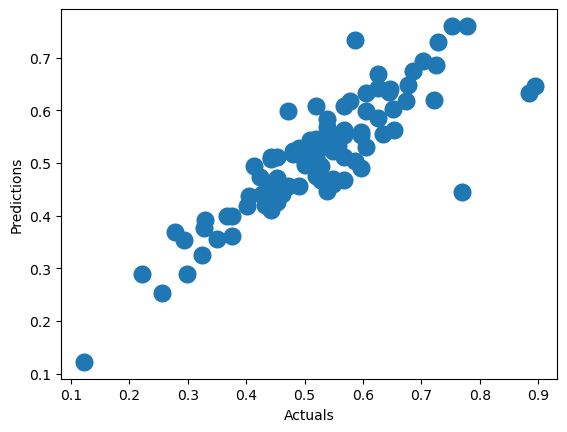

In [31]:
import numpy as np
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df['Actuals'], df['Predictions'])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Actuals'], df['Predictions'])

# Calculate R-squared (R2) score
r_squared = r2_score(df['Actuals'], df['Predictions'])

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r_squared)


from matplotlib import pyplot as plt
plt.scatter(df['Actuals'], df['Predictions'], linewidths=7)

# Labels and title
plt.xlabel('Actuals')
plt.ylabel('Predictions')

# Show plot
plt.show()


# 26 JAN

Mean Squared Error (MSE): 0.0005393128495714291
Mean Absolute Error (MAE): 0.01889857142857145
R-squared (R2) score: 0.9549652441496452


Text(0, 0.5, 'Prediction')

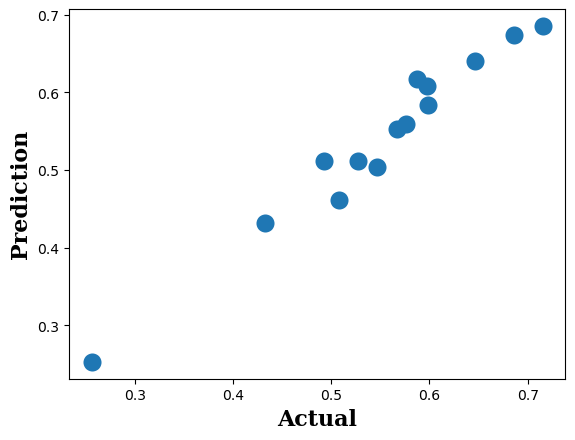

In [32]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is your DataFrame containing the predicted and actual values
df = pd.DataFrame({
    'Predictions': [0.640836, 0.673786, 0.685487, 0.552540, 0.503688, 0.511154, 0.511029, 0.460821, 0.559327, 
               0.617383, 0.608317, 0.583221, 0.252739, 0.432103],
    'Actuals': [0.646368, 0.685897, 0.715427, 0.567308, 0.546538, 0.527308, 0.492308, 0.508077, 0.576154, 
           0.586923, 0.597308, 0.598462, 0.256410, 0.432143]
})

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df['Actuals'], df['Predictions'])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Actuals'], df['Predictions'])

# Calculate R-squared (R2) score
r_squared = r2_score(df['Actuals'], df['Predictions'])

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r_squared)


from matplotlib import pyplot as plt
plt.scatter(df['Actuals'], df['Predictions'], linewidths=7)
plt.xlabel('Actual',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Prediction',fontsize=16, fontweight='bold',fontfamily='serif')

# Model 15

**JAN**

In [13]:
data = {'Predictions' : [0.466074, 0.516726, 0.555693, 0.570394, 0.571471, 0.550298, 0.541534, 0.521348, 0.503202, 
                0.426519, 0.476946, 0.532185, 0.542525, 0.522871, 0.542359, 0.527303, 0.530115, 0.481304, 
                0.477864, 0.579980, 0.624728, 0.657646, 0.612000, 0.567774, 0.520535, 0.524781, 0.448568, 
                0.475832, 0.440801, 0.424229, 0.439678, 0.431705, 0.454317, 0.440565, 0.524191, 0.469519, 
                0.480096, 0.509015, 0.203181, 0.211491, 0.273103, 0.307287, 0.332318, 0.437711, 0.422267, 
                0.463449, 0.484060, 0.808941, 0.751474, 0.720936, 0.684187, 0.652310, 0.617993, 0.595730, 
                0.552543, 0.539641, 0.505901, 0.492803, 0.480973, 0.454528, 0.457398, 0.489289, 0.499293, 
                0.560557, 0.466857, 0.338643, 0.365574, 0.622256, 0.682283, 0.683207, 0.558965, 0.538998, 
                0.445254, 0.500428, 0.621134, 0.543603, 0.533882, 0.507505, 0.451609],

'Actuals' : [0.538462, 0.548077, 0.557692, 0.567308, 0.567308, 0.567308, 0.548077, 0.528846, 0.509615, 
            0.519231, 0.528846, 0.548077, 0.538462, 0.538462, 0.548077, 0.538462, 0.519231, 0.528846, 
            0.519231, 0.605769, 0.634615, 0.644231, 0.605769, 0.538462, 0.519231, 0.500000, 0.500000, 
            0.480769, 0.442308, 0.432692, 0.442308, 0.451923, 0.461538, 0.480769, 0.490385, 0.509615, 
            0.509615, 0.528846, 0.221154, 0.298077, 0.323718, 0.349359, 0.375000, 0.400641, 0.426282, 
            0.451923, 0.413462, 0.778846, 0.753205, 0.727564, 0.701923, 0.676282, 0.650641, 0.625000, 
            0.596154, 0.653846, 0.509615, 0.451923, 0.423077, 0.432692, 0.461538, 0.471154, 0.490385, 
            0.442308, 0.404915, 0.367521, 0.330128, 0.606838, 0.646368, 0.685897, 0.567308, 0.442308, 
            0.548077, 0.596154, 0.576923, 0.567308, 0.538462, 0.490385, 0.451923]
       }

df = pd.DataFrame(data)
print(df)

    Predictions   Actuals
0      0.466074  0.538462
1      0.516726  0.548077
2      0.555693  0.557692
3      0.570394  0.567308
4      0.571471  0.567308
..          ...       ...
74     0.621134  0.576923
75     0.543603  0.567308
76     0.533882  0.538462
77     0.507505  0.490385
78     0.451609  0.451923

[79 rows x 2 columns]


Mean Squared Error (MSE): 0.001678362797949367
Mean Absolute Error (MAE): 0.029474101265822783
R-squared (R2) score: 0.8370184575691607


Text(0, 0.5, 'Prediction')

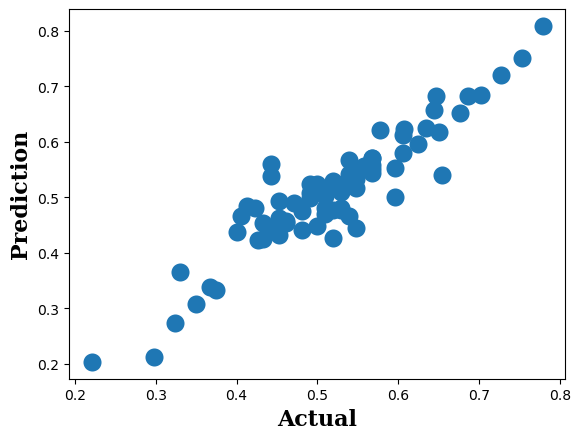

In [14]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df['Actuals'], df['Predictions'])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Actuals'], df['Predictions'])

# Calculate R-squared (R2) score
r_squared = r2_score(df['Actuals'], df['Predictions'])

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r_squared)


from matplotlib import pyplot as plt
plt.scatter(df['Actuals'], df['Predictions'], linewidths=7)
plt.xlabel('Actual',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Prediction',fontsize=16, fontweight='bold',fontfamily='serif')

**26 JAN**

    Predictions   Actuals
0      0.480096  0.509615
1      0.509015  0.528846
2      0.203181  0.221154
3      0.211491  0.298077
4      0.273103  0.323718
5      0.307287  0.349359
6      0.332318  0.375000
7      0.437711  0.400641
8      0.422267  0.426282
9      0.463449  0.451923
10     0.484060  0.413462
11     0.808941  0.778846
12     0.751474  0.753205
13     0.720936  0.727564
14     0.684187  0.701923
Mean Squared Error (MSE): 0.0015341947633999997
Mean Absolute Error (MAE): 0.03124513333333333
R-squared (R2) score: 0.9482304459769244


Text(0, 0.5, 'Prediction')

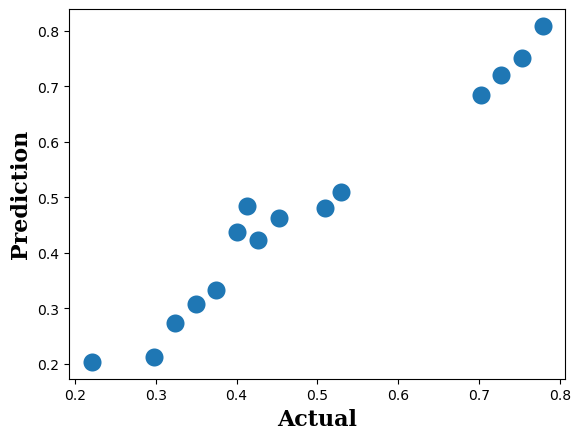

In [15]:
 data =  {'Predictions' : [0.480096, 0.509015, 0.203181, 0.211491, 0.273103, 0.307287, 0.332318, 0.437711, 0.422267, 
                0.463449, 0.484060, 0.808941, 0.751474, 0.720936, 0.684187],
    
    'Actuals' :[0.509615, 0.528846, 0.221154, 0.298077, 0.323718, 0.349359, 0.375000, 0.400641, 0.426282, 
            0.451923, 0.413462, 0.778846, 0.753205, 0.727564, 0.701923]
   }

df = pd.DataFrame(data)
print(df)

mse = mean_squared_error(df['Actuals'], df['Predictions'])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Actuals'], df['Predictions'])

# Calculate R-squared (R2) score
r_squared = r2_score(df['Actuals'], df['Predictions'])

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r_squared)


from matplotlib import pyplot as plt
plt.scatter(df['Actuals'], df['Predictions'], linewidths=7)
plt.xlabel('Actual',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Prediction',fontsize=16, fontweight='bold',fontfamily='serif')

**FEB**

In [16]:
 data =  {'Predictions' : [0.418900, 0.399717, 0.401815, 0.423892, 0.738891, 0.829871, 0.810832, 0.760878, 0.726963, 0.667861, 
                0.656459, 0.577329, 0.556933, 0.517524, 0.430448, 0.205974, 0.175577, 0.144007, 0.156336, 0.160004, 
                0.215248, 0.267324, 0.353790, 0.396767, 0.345432, 0.353103, 0.438336, 0.496222, 0.569539, 0.606462, 
                0.650090, 0.642514, 0.363631, 0.455826, 0.565721, 0.705712, 0.755806, 0.793016, 0.793229, 0.792834, 
                0.725120, 0.702331, 0.688525, 0.624738, 0.691471, 0.719776, 0.785396, 0.754715, 0.749841, 0.721249, 
                0.772816, 0.630352, 0.589723, 0.548210, 0.461168, 0.505984, 0.561395, 0.564573, 0.589585, 0.559913, 
                0.528941, 0.493634, 0.477856, 0.477647, 0.536950, 0.349284, 0.156245, 0.208223, 0.367398, 0.259758, 
                0.435936, 0.535888, 0.578982, 0.649562, 0.576788, 0.714125, 0.771570, 0.771935, 0.765767, 0.713050, 
                0.696690, 0.627532, 0.562489, 0.497083, 0.457194, 0.443565, 0.467919, 0.433118, 0.439208, 0.483793, 
                0.491903, 0.500190, 0.504601, 0.481242, 0.424287, 0.445331, 0.467735, 0.445761, 0.468072, 0.459511, 
                0.477872, 0.504254, 0.498380, 0.498119, 0.397410, 0.246024, 0.442089, 0.460000, 0.443076, 0.416501, 
                0.420874, 0.385018, 0.384379, 0.373365, 0.285030, 0.273703, 0.256574, 0.269607, 0.265631, 0.201197, 
                0.168956, 0.511411, 0.565745, 0.585324, 0.710114, 0.836075, 0.859515, 0.857978, 0.850130, 0.820180, 
                0.776250, 0.725668, 0.692046, 0.664168, 0.513011, 0.497765, 0.518280, 0.521330, 0.566771, 0.584409, 
                0.589588, 0.577108, 0.559312, 0.542077, 0.528256, 0.598469, 0.614416, 0.626626, 0.610671, 0.601722, 
                0.601566, 0.569797, 0.521901, 0.497360, 0.501481, 0.532009, 0.503019, 0.499132, 0.495940, 0.499649, 
                0.526706, 0.511241, 0.520045, 0.484961, 0.350996, 0.234166, 0.207871, 0.202613, 0.204183, 0.226133, 
                0.241746, 0.282681, 0.295751, 0.327557, 0.604238, 0.670148, 0.670188, 0.709655, 0.702987, 0.733503, 
                0.691283, 0.679606, 0.711692, 0.670882, 0.504453, 0.433976, 0.553236, 0.570472, 0.519617, 0.566489, 
                0.774019, 0.562883, 0.499781, 0.492392, 0.538974, 0.707044, 0.726097, 0.752736, 0.765641, 0.715478, 
                0.662795, 0.672626, 0.619877, 0.356284, 0.333158, 0.206437, 0.361673, 0.331481, 0.505083, 0.490991, 
                0.484999, 0.469740, 0.500047, 0.531536, 0.662619],
    
    'Actuals' :[0.346154, 0.269231, 0.192308, 0.951923, 0.901923, 0.851923, 0.801923, 0.751923, 0.701923, 0.651923, 
            0.601923, 0.551923, 0.501923, 0.451923, 0.163462, 0.128205, 0.092949, 0.057692, 0.048077, 0.096154, 
            0.144231, 0.192308, 0.240385, 0.300481, 0.360577, 0.420673, 0.480769, 0.540865, 0.600962, 0.661058, 
            0.721154, 0.640385, 0.355769, 0.653846, 0.721154, 0.788462, 0.855769, 0.851763, 0.847756, 0.843750, 
            0.839744, 0.735737, 0.831731, 0.827724, 0.823718, 0.819712, 0.815705, 0.811699, 0.807692, 0.894231, 
            0.692308, 0.634615, 0.567308, 0.480769, 0.567308, 0.586538, 0.615385, 0.596154, 0.557692, 0.519231, 
            0.461538, 0.403846, 0.346154, 0.557692, 0.298077, 0.009615, 0.187500, 0.365385, 0.057692, 0.442308, 
            0.538462, 0.634615, 0.730769, 0.576923, 0.846154, 0.849359, 0.852564, 0.855769, 0.822115, 0.788462, 
            0.705128, 0.621795, 0.538462, 0.519231, 0.519231, 0.500000, 0.490385, 0.500000, 0.519231, 0.519231, 
            0.519231, 0.528846, 0.519231, 0.500000, 0.480769, 0.480769, 0.490385, 0.500000, 0.500000, 0.500000, 
            0.528846, 0.528846, 0.538462, 0.413462, 0.173077, 0.557692, 0.512821, 0.467949, 0.423077, 0.386538, 
            0.350000, 0.313462, 0.276923, 0.240385, 0.242788, 0.245192, 0.247596, 0.250000, 0.129808, 0.009615, 
            0.692308, 0.711538, 0.730769, 0.903846, 0.899573, 0.895299, 0.891026, 0.886752, 0.882479, 0.878205, 
            0.873932, 0.869658, 0.865385, 0.519231, 0.528846, 0.528846, 0.548077, 0.596154, 0.615385, 0.615385, 
            0.615385, 0.605769, 0.576923, 0.576923, 0.625000, 0.653846, 0.663462, 0.644231, 0.625000, 0.615385, 
            0.596154, 0.557692, 0.528846, 0.538462, 0.557692, 0.557692, 0.548077, 0.480769, 0.538462, 0.538462, 
            0.538462, 0.548077, 0.528846, 0.307692, 0.201923, 0.189904, 0.177885, 0.165865, 0.153846, 0.141827, 
            0.129808, 0.117788, 0.105769, 0.653846, 0.663462, 0.686298, 0.709135, 0.731971, 0.754808, 0.777644, 
            0.800481, 0.823317, 0.846154, 0.509615, 0.442308, 0.519231, 0.548077, 0.519231, 0.576923, 0.932692, 
            0.586538, 0.543269, 0.500000, 0.596154, 0.730769, 0.711538, 0.740385, 0.788462, 0.759615, 0.750000, 
            0.788462, 0.721154, 0.653846, 0.326923, 0.334615, 0.173077, 0.355769, 0.538462, 0.519231, 0.509615, 
            0.500000, 0.509615, 0.519231, 0.588462, 0.704808]
   }

df = pd.DataFrame(data)
print(df)


     Predictions   Actuals
0       0.418900  0.346154
1       0.399717  0.269231
2       0.401815  0.192308
3       0.423892  0.951923
4       0.738891  0.901923
..           ...       ...
210     0.484999  0.500000
211     0.469740  0.509615
212     0.500047  0.519231
213     0.531536  0.588462
214     0.662619  0.704808

[215 rows x 2 columns]


Mean Squared Error (MSE): 0.013434303851441858
Mean Absolute Error (MAE): 0.08062913488372093
R-squared (R2) score: 0.7277089278175655


Text(0, 0.5, 'Prediction')

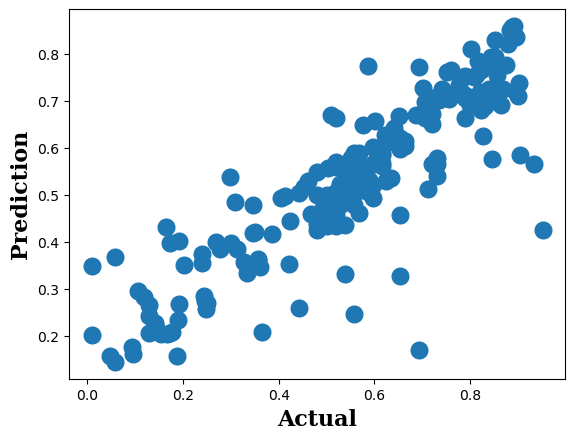

In [17]:

mse = mean_squared_error(df['Actuals'], df['Predictions'])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Actuals'], df['Predictions'])

# Calculate R-squared (R2) score
r_squared = r2_score(df['Actuals'], df['Predictions'])

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r_squared)


from matplotlib import pyplot as plt
plt.scatter(df['Actuals'], df['Predictions'], linewidths=7)
plt.xlabel('Actual',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Prediction',fontsize=16, fontweight='bold',fontfamily='serif')

**2 FEB**

In [18]:
 data =  {'Predictions' : [0.810832, 0.760878, 0.726963, 0.667861, 0.656459, 0.577329, 0.556933, 0.517524, 0.430448, 
                0.205974, 0.175577, 0.144007, 0.156336, 0.160004, 0.215248, 0.267324, 0.353790, 0.396767, 
                0.345432],
    
    'Actuals' :[0.851923, 0.801923, 0.751923, 0.701923, 0.651923, 0.601923, 0.551923, 0.501923, 0.451923, 
            0.163462, 0.028205, 0.092949, 0.057692, 0.048077, 0.196154, 0.144231, 0.292308, 0.340385, 
            0.300481]
   }

df = pd.DataFrame(data)
print(df)



    Predictions   Actuals
0      0.810832  0.851923
1      0.760878  0.801923
2      0.726963  0.751923
3      0.667861  0.701923
4      0.656459  0.651923
5      0.577329  0.601923
6      0.556933  0.551923
7      0.517524  0.501923
8      0.430448  0.451923
9      0.205974  0.163462
10     0.175577  0.028205
11     0.144007  0.092949
12     0.156336  0.057692
13     0.160004  0.048077
14     0.215248  0.196154
15     0.267324  0.144231
16     0.353790  0.292308
17     0.396767  0.340385
18     0.345432  0.300481


Mean Squared Error (MSE): 0.004178868678894737
Mean Absolute Error (MAE): 0.050994157894736825
R-squared (R2) score: 0.9425668648622418


Text(0, 0.5, 'Prediction')

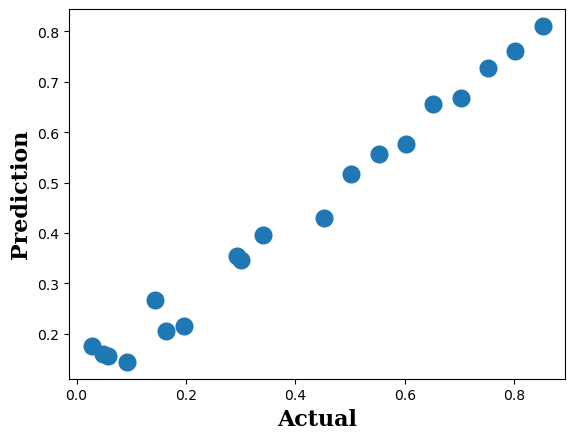

In [19]:
mse = mean_squared_error(df['Actuals'], df['Predictions'])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Actuals'], df['Predictions'])

# Calculate R-squared (R2) score
r_squared = r2_score(df['Actuals'], df['Predictions'])

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r_squared)


from matplotlib import pyplot as plt
plt.scatter(df['Actuals'], df['Predictions'], linewidths=7)
plt.xlabel('Actual',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Prediction',fontsize=16, fontweight='bold',fontfamily='serif')

# MODEL

**JAN**

     Predictions   Actuals
0       0.468268  0.538462
1       0.491345  0.548077
2       0.539227  0.557692
3       0.553969  0.567308
4       0.568484  0.567308
..           ...       ...
114     0.610272  0.576923
115     0.593745  0.567308
116     0.571119  0.538462
117     0.532536  0.490385
118     0.472936  0.451923

[119 rows x 2 columns]
Mean Squared Error (MSE): 0.006006810350932772
Mean Absolute Error (MAE): 0.05216158823529411
R-squared (R2) score: 0.7520276332661613


Text(0, 0.5, 'Prediction')

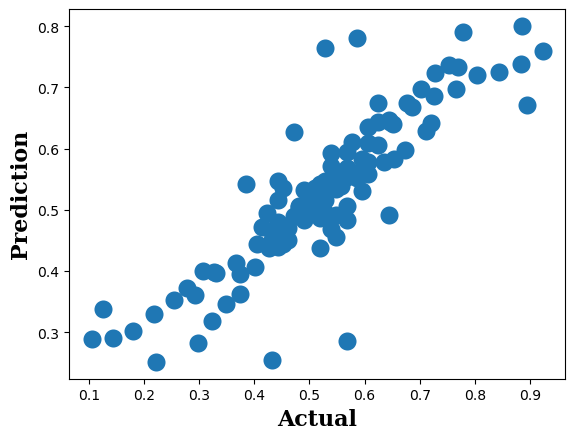

In [20]:
 data =  {'Predictions' : [0.468268, 0.491345, 0.539227, 0.553969, 0.568484, 0.563258, 0.559483, 0.546584, 0.521143, 0.486791, 
                0.491388, 0.537770, 0.550323, 0.548713, 0.533575, 0.541463, 0.520703, 0.495222, 0.508328, 0.483657, 
                0.531143, 0.558347, 0.578845, 0.647246, 0.643173, 0.634580, 0.609257, 0.592004, 0.534068, 0.494758, 
                0.542273, 0.399320, 0.362599, 0.398726, 0.372400, 0.338570, 0.254247, 0.438165, 0.513528, 0.503076, 
                0.491665, 0.628943, 0.674385, 0.598241, 0.642294, 0.670665, 0.781184, 0.542701, 0.506452, 0.480069, 
                0.450505, 0.439956, 0.443911, 0.450854, 0.505319, 0.505758, 0.519927, 0.534879, 0.516443, 0.251388, 
                0.282589, 0.318631, 0.345430, 0.395716, 0.406075, 0.437560, 0.460006, 0.472134, 0.733634, 0.800377, 
                0.790541, 0.735886, 0.724106, 0.696743, 0.674761, 0.639772, 0.605585, 0.565279, 0.583052, 0.626361, 
                0.496944, 0.535232, 0.494255, 0.463194, 0.469559, 0.489107, 0.483357, 0.515533, 0.444492, 0.412537, 
                0.397245, 0.360623, 0.353112, 0.330482, 0.302328, 0.290498, 0.288980, 0.285041, 0.578364, 0.643394, 
                0.668502, 0.685333, 0.697248, 0.719383, 0.725849, 0.737417, 0.758707, 0.764737, 0.506043, 0.552452, 
                0.567290, 0.546792, 0.454835, 0.582514, 0.610272, 0.593745, 0.571119, 0.532536, 0.472936],
    
    'Actuals' :[0.538462, 0.548077, 0.557692, 0.567308, 0.567308, 0.567308, 0.548077, 0.528846, 0.509615, 0.519231, 
            0.528846, 0.548077, 0.538462, 0.538462, 0.548077, 0.538462, 0.519231, 0.528846, 0.519231, 0.567308, 
            0.596154, 0.605769, 0.634615, 0.644231, 0.625000, 0.605769, 0.605769, 0.538462, 0.519231, 0.528846, 
            0.384615, 0.307692, 0.375000, 0.326923, 0.278846, 0.125000, 0.432692, 0.519231, 0.500000, 0.500000, 
            0.644231, 0.711538, 0.625000, 0.673077, 0.721154, 0.894231, 0.586538, 0.519231, 0.480769, 0.442308, 
            0.432692, 0.442308, 0.451923, 0.461538, 0.480769, 0.490385, 0.509615, 0.509615, 0.528846, 0.221154, 
            0.298077, 0.323718, 0.349359, 0.375000, 0.400641, 0.426282, 0.451923, 0.413462, 0.769231, 0.884615, 
            0.778846, 0.753205, 0.727564, 0.701923, 0.676282, 0.650641, 0.625000, 0.596154, 0.653846, 0.471154, 
            0.509615, 0.451923, 0.423077, 0.432692, 0.461538, 0.471154, 0.490385, 0.442308, 0.404915, 0.367521, 
            0.330128, 0.292735, 0.255342, 0.217949, 0.180556, 0.143162, 0.105769, 0.567308, 0.606838, 0.646368, 
            0.685897, 0.725427, 0.764957, 0.804487, 0.844017, 0.883547, 0.923077, 0.528846, 0.567308, 0.586538, 
            0.567308, 0.442308, 0.548077, 0.596154, 0.576923, 0.567308, 0.538462, 0.490385, 0.451923]
   }

df = pd.DataFrame(data)
print(df)

mse = mean_squared_error(df['Actuals'], df['Predictions'])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Actuals'], df['Predictions'])

# Calculate R-squared (R2) score
r_squared = r2_score(df['Actuals'], df['Predictions'])

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r_squared)


from matplotlib import pyplot as plt
plt.scatter(df['Actuals'], df['Predictions'], linewidths=7)
plt.xlabel('Actual',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Prediction',fontsize=16, fontweight='bold',fontfamily='serif')

**26JAN**

    Predictions   Actuals
0      0.534879  0.509615
1      0.516443  0.528846
2      0.251388  0.221154
3      0.282589  0.298077
4      0.318631  0.323718
5      0.345430  0.349359
6      0.395716  0.375000
7      0.406075  0.400641
8      0.437560  0.426282
9      0.460006  0.451923
10     0.472134  0.413462
11     0.733634  0.769231
12     0.800377  0.884615
13     0.790541  0.778846
14     0.735886  0.753205
15     0.724106  0.727564
16     0.696743  0.701923
Mean Squared Error (MSE): 0.0008776295521764708
Mean Absolute Error (MAE): 0.020827941176470584
R-squared (R2) score: 0.9773510362547346


Text(0, 0.5, 'Prediction')

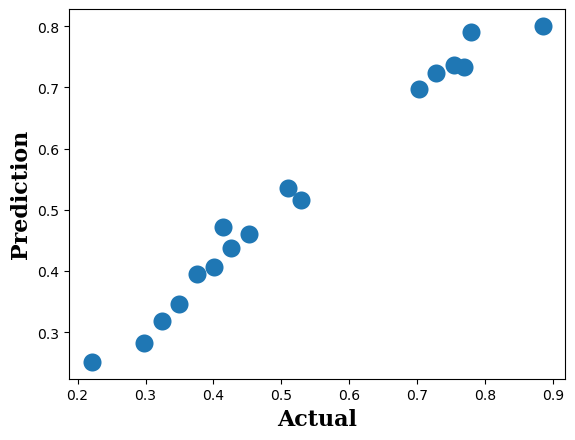

In [21]:
 data = {'Predictions' : [0.534879, 0.516443, 0.251388, 0.282589, 0.318631, 0.345430, 0.395716, 0.406075, 0.437560, 0.460006, 0.472134, 0.733634, 0.800377, 
                0.790541, 0.735886, 0.724106, 0.696743],
    
    'Actuals' :[0.509615, 0.528846, 0.221154, 0.298077, 0.323718, 0.349359, 0.375000, 0.400641, 0.426282, 0.451923, 0.413462, 0.769231, 0.884615, 
            0.778846, 0.753205, 0.727564, 0.701923,]
       }

df = pd.DataFrame(data)
print(df)

mse = mean_squared_error(df['Actuals'], df['Predictions'])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Actuals'], df['Predictions'])

# Calculate R-squared (R2) score
r_squared = r2_score(df['Actuals'], df['Predictions'])

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r_squared)


from matplotlib import pyplot as plt
plt.scatter(df['Actuals'], df['Predictions'], linewidths=7)
plt.xlabel('Actual',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Prediction',fontsize=16, fontweight='bold',fontfamily='serif')

**FEB**

     Predictions   Actuals
0       0.439461  0.346154
1       0.418335  0.269231
2       0.393081  0.192308
3       0.348041  0.951923
4       0.807991  0.901923
..           ...       ...
234     0.428905  0.355769
235     0.417793  0.759615
236     0.691163  0.485577
237     0.513395  0.211538
238     0.322336  0.605769

[239 rows x 2 columns]
Mean Squared Error (MSE): 0.015465467814602509
Mean Absolute Error (MAE): 0.08271670292887029
R-squared (R2) score: 0.707427797033304


Text(0, 0.5, 'Prediction')

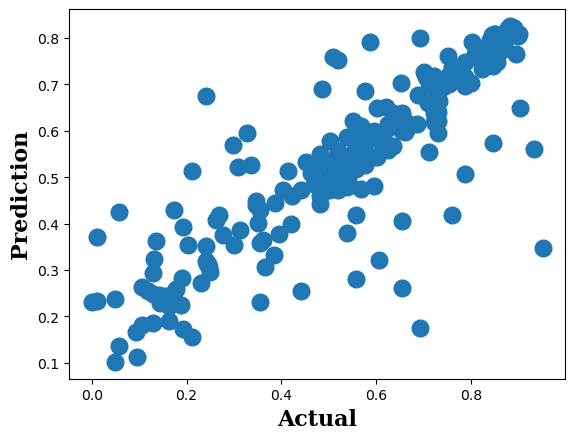

In [23]:
 data =  {'Predictions' : [0.439461, 0.418335, 0.393081, 0.348041, 0.807991, 0.808052, 0.791348, 0.762091, 0.726417, 0.702072, 0.649622, 0.620295, 0.579044, 0.532997, 0.189861, 
                0.185239, 0.166577, 0.137155, 0.101826, 0.113345, 0.228986, 0.173366, 0.320379, 0.354492, 0.365239, 
                0.398673, 0.442482, 0.493657, 0.543072, 0.598519, 0.639202, 0.674485, 0.358206, 0.406042, 0.618762, 0.695665, 0.747842, 0.799554, 0.808241, 0.805801,
                          0.795348, 0.784198, 0.768208, 0.737000, 0.734269, 0.774894, 0.773251, 0.767514, 0.765383, 0.764664, 0.800969, 0.639311, 0.609806, 0.550981, 0.474383, 0.546370,
                           0.572706, 0.600698, 0.583546, 0.556482, 0.509221, 0.473148, 0.449383, 0.419236, 0.569874, 0.370267, 0.224070, 0.306863, 0.426098, 0.255023, 0.501841, 0.566278,
                           0.621208, 0.685753, 0.573479, 0.770331, 0.756770, 0.768623, 0.771220, 0.747926, 0.715627, 0.650776, 0.586826, 0.512362, 0.494427, 0.487519, 0.485195, 0.473083,
                           0.479473, 0.491606, 0.497020, 0.502509, 0.515838, 0.499077, 0.460487, 0.481227, 0.486815, 0.493339, 0.508029, 0.508762, 0.505889, 0.512337, 0.505042, 0.512508, 0.429099, 0.281403, 0.493320, 0.486045, 0.459659, 0.444387, 0.402208, 0.386407, 0.375779, 0.351979, 0.312232, 0.313337, 0.307280, 0.296506, 0.293473, 0.233746, 0.175444, 0.553486, 0.640518, 0.648705, 0.804256, 0.809471, 0.821054, 0.824696, 0.826171, 0.821640, 0.798355, 0.783312, 0.773978, 0.753256, 0.512890, 0.543512, 0.536223, 0.542533, 0.568817, 0.586813, 0.575618, 0.579227, 0.576644, 0.541844, 0.558379, 0.600641, 0.618362, 0.619615, 0.606136, 0.597055, 0.585683, 0.566658, 0.538309, 0.519035, 0.518176, 
                          0.538097, 0.515448, 0.531154, 0.478112, 0.528280, 0.529563, 0.533566, 0.535788, 0.521802, 0.354040, 0.282022, 0.258735, 0.246796, 0.243756, 0.247133, 0.247736, 0.255677, 0.263895, 0.261903, 0.602853, 0.614781, 0.659162, 0.664704, 0.700052, 0.716167, 0.704125, 0.746126, 0.740409, 0.759219, 0.473506, 0.472013, 0.548971, 0.550939, 0.527018, 0.560344, 0.791221, 0.510953, 0.530936, 0.481598, 0.595706, 0.704094, 0.693757, 0.715451, 0.738574, 0.701811, 0.702519, 0.717534, 0.625816, 0.595513, 0.363476, 0.249875, 0.230520, 0.380495, 0.551105, 0.519174, 0.505654, 0.502266, 0.513750, 0.507898, 0.719416, 
                          0.691795, 0.677202, 0.638782, 0.624554, 0.614171, 0.590026, 0.574279, 0.550151, 0.526802, 0.376597, 0.407972, 0.323078, 0.232017, 0.155330, 0.236460, 0.180975, 0.221875, 0.272296, 0.332488, 0.428905, 0.417793, 0.691163, 0.513395, 0.322336],
    
    'Actuals' :[0.346154, 0.269231, 0.192308, 0.951923, 0.901923, 0.851923, 0.801923, 0.751923, 0.701923, 0.651923, 0.601923, 0.551923, 0.501923, 0.451923, 0.163462, 
            0.128205, 0.092949, 0.057692, 0.048077, 0.096154, 0.144231, 0.192308, 0.240385, 0.300481, 0.360577, 
            0.420673, 0.480769, 0.540865, 0.600962, 0.661058, 0.721154, 0.240385, 0.355769, 0.653846, 0.721154, 0.788462, 0.855769, 0.851763, 0.847756, 0.843750,
               0.839744, 0.835737, 0.831731, 0.827724, 0.823718, 0.819712, 0.815705, 0.811699, 0.807692, 0.894231, 0.692308, 0.634615, 0.567308, 0.480769, 0.567308,
                0.586538, 0.615385, 0.596154, 0.557692, 0.519231, 0.461538, 0.403846, 0.346154, 0.557692, 0.298077, 0.009615, 0.187500, 0.365385, 0.057692, 0.442308,
                0.538462, 0.634615, 0.730769, 0.576923, 0.846154, 0.849359, 0.852564, 0.855769, 0.822115, 0.788462, 0.705128, 0.621795, 0.538462, 0.519231, 0.519231, 
                0.500000, 0.490385, 0.500000, 0.519231, 0.519231, 0.519231, 0.528846, 0.519231, 0.500000, 0.480769, 0.480769, 0.490385, 0.500000, 0.500000, 0.500000, 0.528846, 0.528846, 0.538462, 0.413462, 0.173077, 0.557692, 0.512821, 0.467949, 0.423077, 0.386538, 0.350000, 0.313462, 0.276923, 0.240385, 0.242788, 0.245192, 0.247596, 0.250000, 0.129808, 0.009615, 0.692308, 0.711538, 0.730769, 0.903846, 0.899573, 0.895299, 0.891026, 0.886752, 0.882479, 0.878205, 0.873932, 0.869658, 0.865385, 0.519231, 0.528846, 0.528846, 0.548077, 0.596154, 0.615385, 0.615385, 0.615385, 0.605769, 0.576923, 0.576923, 0.625000, 0.653846, 0.663462, 0.644231, 0.625000, 0.615385, 0.596154, 0.557692, 0.528846, 0.538462, 0.557692, 
               0.557692, 0.548077, 0.480769, 0.538462, 0.538462, 0.538462, 0.548077, 0.528846, 0.307692, 0.201923, 0.189904, 0.177885, 0.165865, 0.153846, 0.141827, 0.129808, 0.117788, 0.105769, 0.653846, 0.663462, 0.686298, 0.709135, 0.731971, 0.754808, 0.777644, 0.800481, 0.823317, 0.846154, 0.509615, 0.442308, 0.519231, 0.548077, 0.519231, 0.576923, 0.932692, 0.586538, 0.543269, 0.500000, 0.596154, 0.730769, 0.711538, 0.740385, 0.788462, 0.759615, 0.750000, 0.788462, 0.721154, 0.653846, 0.326923, 0.134615, 0.173077, 0.355769, 0.538462, 0.519231, 0.509615, 0.500000, 0.509615, 0.519231, 0.788462, 0.754808, 
               0.721154, 0.687500, 0.653846, 0.644231, 0.625000, 0.605769, 0.576923, 0.548077, 0.336538, 0.394231, 0.262821, 0.131410, 0.000000, 0.211538, 0.048077, 0.105769, 0.163462, 0.230769, 0.384615, 0.355769, 0.759615, 0.485577, 0.211538, 0.605769]
   }

df = pd.DataFrame(data)
print(df)

mse = mean_squared_error(df['Actuals'], df['Predictions'])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Actuals'], df['Predictions'])

# Calculate R-squared (R2) score
r_squared = r2_score(df['Actuals'], df['Predictions'])

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r_squared)


from matplotlib import pyplot as plt
plt.scatter(df['Actuals'], df['Predictions'], linewidths=7)
plt.xlabel('Actual',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Prediction',fontsize=16, fontweight='bold',fontfamily='serif')

**2FEB**

    Predictions   Actuals
0      0.808052  0.851923
1      0.791348  0.801923
2      0.762091  0.751923
3      0.726417  0.701923
4      0.702072  0.651923
5      0.649622  0.601923
6      0.620295  0.551923
7      0.579044  0.501923
8      0.532997  0.451923
9      0.189861  0.163462
10     0.185239  0.128205
11     0.166577  0.092949
12     0.137155  0.057692
13     0.101826  0.048077
14     0.113345  0.096154
15     0.228986  0.144231
16     0.173366  0.192308
17     0.320379  0.240385
18     0.354492  0.300481
19     0.365239  0.360577
20     0.398673  0.420673
Mean Squared Error (MSE): 0.002902820057666667
Mean Absolute Error (MAE): 0.04692147619047619
R-squared (R2) score: 0.9570896185935395


Text(0, 0.5, 'Prediction')

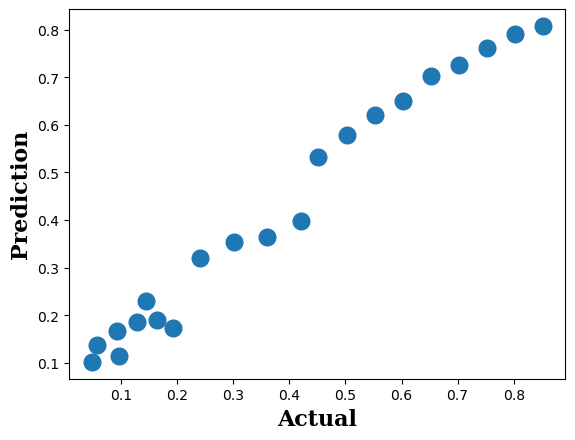

In [25]:
 data =  {'Predictions' : [0.808052, 0.791348, 0.762091, 0.726417, 0.702072, 0.649622, 0.620295, 0.579044, 0.532997, 0.189861, 
                0.185239, 0.166577, 0.137155, 0.101826, 0.113345, 0.228986, 0.173366, 0.320379, 0.354492, 0.365239, 
                0.398673],
    
    'Actuals' :[0.851923, 0.801923, 0.751923, 0.701923, 0.651923, 0.601923, 0.551923, 0.501923, 0.451923, 0.163462, 
            0.128205, 0.092949, 0.057692, 0.048077, 0.096154, 0.144231, 0.192308, 0.240385, 0.300481, 0.360577, 
            0.420673]
   }
df = pd.DataFrame(data)
print(df)

mse = mean_squared_error(df['Actuals'], df['Predictions'])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Actuals'], df['Predictions'])

# Calculate R-squared (R2) score
r_squared = r2_score(df['Actuals'], df['Predictions'])

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r_squared)


from matplotlib import pyplot as plt
plt.scatter(df['Actuals'], df['Predictions'], linewidths=7)
plt.xlabel('Actual',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Prediction',fontsize=16, fontweight='bold',fontfamily='serif')

# MODEL 33

**JAN**

In [138]:
data = { 'Predictions' : [0.484707, 0.503455, 0.549031, 0.559530, 0.574793, 0.566508, 0.551532, 0.535900, 0.511226, 0.489184, 0.510500, 0.555342, 0.554003, 0.554313, 0.534406, 0.539221, 0.514476, 0.489670, 0.500118, 0.483806, 0.550692, 0.583160, 0.600148, 0.660555, 0.651684, 0.636723, 0.599749, 0.575971, 0.529772, 0.489548, 0.550364, 0.312740, 0.351806, 0.387574, 0.286359, 0.260407, 0.384051, 0.461116, 0.568087, 0.552711, 0.523885, 0.637804, 0.692460, 0.621559, 0.651550, 0.682216, 0.573714, 0.564968, 0.458713, 0.455903, 0.456321, 0.446900, 0.451951, 0.471519, 0.524513, 0.512926, 0.521272, 
                          0.532293, 0.513659, 0.506221, 0.255691, 0.262209, 0.326420, 0.380052, 0.429973, 0.439785, 0.466940, 0.480531, 0.488159, 0.442033, 0.700654, 0.814990, 0.758300, 0.719759, 0.699308, 
                          0.668918, 0.622614, 0.585629, 0.540185, 0.566514, 0.631606, 0.510947, 0.507181, 0.486539, 0.456780, 0.467873, 0.497303, 0.506603, 0.534141, 0.463416, 0.422738, 0.405064, 0.365814, 0.363647, 0.343644, 0.333066, 0.340508, 0.362391, 0.386585, 0.652039, 0.723935, 0.688505, 0.679393, 0.689680, 0.720216, 0.716966, 0.720033, 0.735014, 0.722581, 0.487439, 0.498801, 0.556724, 0.541932, 0.452353, 0.571057, 0.615877, 0.590995, 0.553291, 0.511328, 0.452222],
                          
             'Actuals' : [0.538462, 0.548077, 0.557692, 0.567308, 0.567308, 0.567308, 0.548077, 0.528846, 0.509615, 0.519231, 0.528846, 0.548077, 0.538462, 0.538462, 0.548077, 0.538462, 0.519231, 0.528846, 0.519231, 0.567308, 0.596154, 0.605769, 0.634615, 0.644231, 0.625000, 0.605769, 0.605769, 0.538462, 0.519231, 0.528846, 0.384615, 0.307692, 0.375000, 0.326923, 0.278846, 0.125000, 0.432692, 0.519231, 0.500000, 0.500000, 0.644231, 0.711538, 0.625000, 0.673077, 0.721154, 0.894231, 0.586538, 0.519231, 0.480769, 0.442308, 0.432692, 0.442308, 0.451923, 0.461538, 0.480769, 0.490385, 0.509615,
                          0.509615, 0.528846, 0.144231, 0.221154, 0.298077, 0.323718, 0.349359, 0.375000, 0.400641, 0.426282, 0.451923, 0.413462, 0.769231, 0.884615, 0.778846, 0.753205, 0.727564, 0.701923, 
                          0.676282, 0.650641, 0.625000, 0.596154, 0.653846, 0.471154, 0.509615, 0.451923, 0.423077, 0.432692, 0.461538, 0.471154, 0.490385, 0.442308, 0.404915, 0.367521, 0.330128, 0.292735, 0.255342, 0.217949, 0.180556, 0.143162, 0.105769, 0.567308, 0.606838, 0.646368, 0.685897, 0.725427, 0.764957, 0.804487, 0.844017, 0.883547, 0.923077, 0.528846, 0.567308, 0.586538, 0.567308, 0.442308, 0.548077, 0.596154, 0.576923, 0.567308, 0.538462, 0.490385, 0.451923]
}

df = pd.DataFrame(data)
print(df)

     Predictions   Actuals
0       0.484707  0.538462
1       0.503455  0.548077
2       0.549031  0.557692
3       0.559530  0.567308
4       0.574793  0.567308
..           ...       ...
115     0.615877  0.576923
116     0.590995  0.567308
117     0.553291  0.538462
118     0.511328  0.490385
119     0.452222  0.451923

[120 rows x 2 columns]


Mean Squared Error (MSE): 0.007485846068158333
Mean Absolute Error (MAE): 0.056955308333333336
R-squared (R2) score: 0.7032115392623565


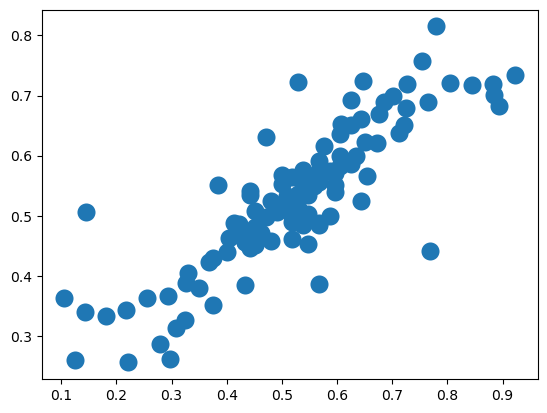

In [139]:
mse = mean_squared_error(df['Actuals'], df['Predictions'])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Actuals'], df['Predictions'])

# Calculate R-squared (R2) score
r_squared = r2_score(df['Actuals'], df['Predictions'])

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r_squared)


from matplotlib import pyplot as plt
plt.scatter(df['Actuals'], df['Predictions'], linewidths=7)

**26JAN**

    Predictions   Actuals
0      0.532293  0.509615
1      0.513659  0.528846
2      0.255691  0.221154
3      0.262209  0.298077
4      0.326420  0.323718
5      0.380052  0.349359
6      0.429973  0.375000
7      0.439785  0.400641
8      0.466940  0.426282
9      0.480531  0.451923
10     0.488159  0.413462
11     0.742033  0.769231
12     0.800654  0.884615
13     0.814990  0.778846
14     0.758300  0.753205
15     0.719759  0.727564
16     0.699308  0.701923
Mean Squared Error (MSE): 0.0015275480080588237
Mean Absolute Error (MAE): 0.03191547058823528
R-squared (R2) score: 0.9605786070354204


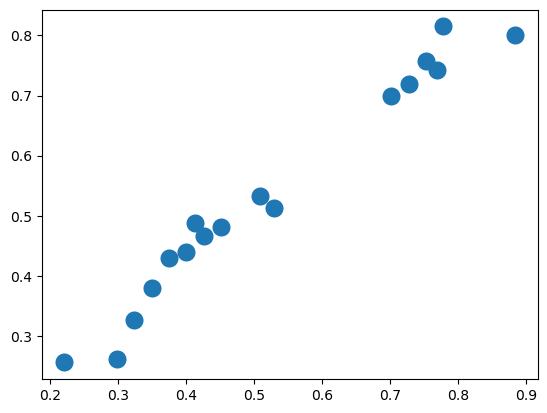

In [142]:
 data =  {'Predictions' : [0.532293, 0.513659, 0.255691, 0.262209, 0.326420, 0.380052, 0.429973, 0.439785, 0.466940, 0.480531, 0.488159, 0.742033, 0.800654, 0.814990, 0.758300, 0.719759, 0.699308, 
],
    
              'Actuals' :[0.509615, 0.528846, 0.221154, 0.298077, 0.323718, 0.349359, 0.375000, 0.400641, 0.426282, 0.451923, 0.413462, 0.769231, 0.884615, 0.778846, 0.753205, 0.727564, 0.701923, 
]
   }
df = pd.DataFrame(data)
print(df)

mse = mean_squared_error(df['Actuals'], df['Predictions'])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Actuals'], df['Predictions'])

# Calculate R-squared (R2) score
r_squared = r2_score(df['Actuals'], df['Predictions'])

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r_squared)


from matplotlib import pyplot as plt
plt.scatter(df['Actuals'], df['Predictions'], linewidths=7)